<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h2><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h2>
<h2><center>Computer Vision Project: Plant Seedlings Classification </center></h2>
<h3><center> <i>By Vaibhav Pradhan</i> </center></h3>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.metrics import classification_report                                                # Importing classification_report to plot the classification_report
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/PGP-AIML/Project6/data/images.npy')      # Read the Image dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/PGP-AIML/Project6/data/Labels.csv')  # Read the labels dataset corresponing to the images

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)         # Check the shape of images
print(labels.shape)         # Check the shape of labels

(4750, 128, 128, 3)
(4750, 1)


Based on the above we have a dataset of 4750 images. Height and Width equals 128 and there are 3 channels

## Exploratory Data Analysis

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

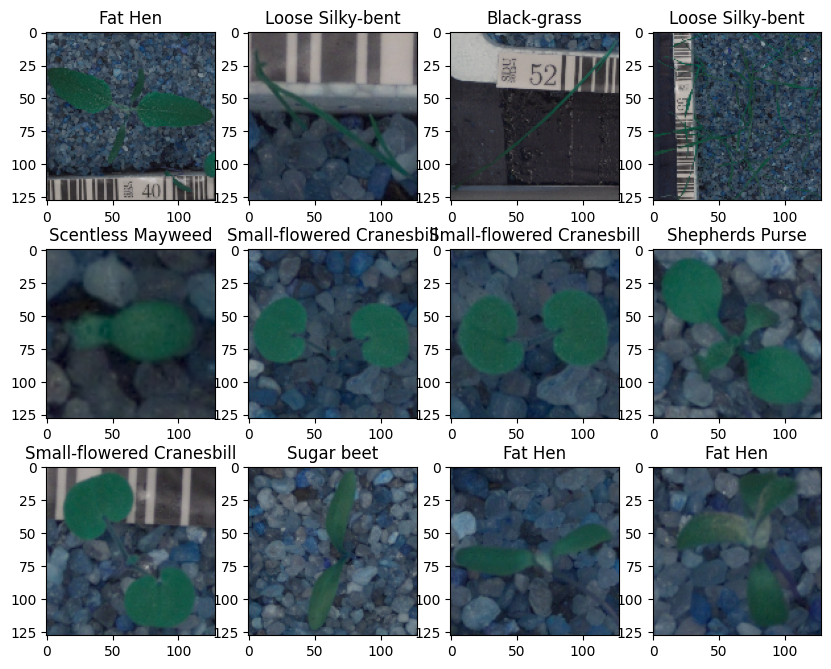

In [ ]:
plot_images(images,labels)   # Input the images and labels to the function and plot the images with their labels

### Checking the distribution of the target variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

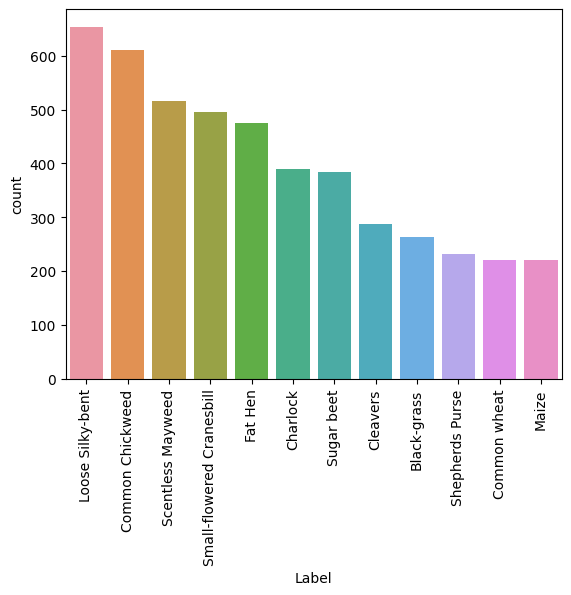

In [ ]:
sns.countplot(x=labels['Label'],order=labels['Label'].value_counts().index)            # Check for data imbalance
plt.xticks(rotation='vertical')

**Observation:** ***Loose Silky-bent*** has maximum number of images in the sample data. The least number of imges are for ***Maize***

## Data Pre-Processing

### Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Convert the images from BGR to RGB

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64                    # Define the height as 64
width =  64                    # Define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

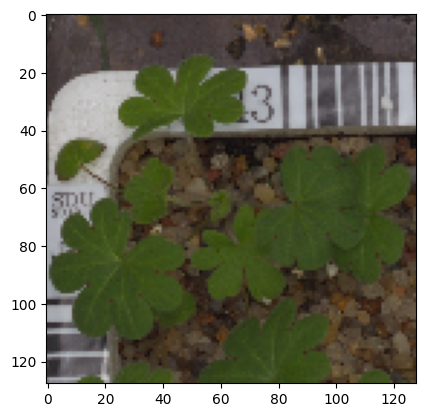

In [ ]:
plt.imshow(images[3])

**Image after resizing**

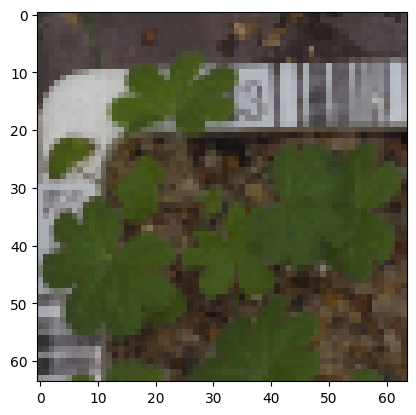

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling


- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels, test_size=0.1, random_state=42,stratify=labels)   # Split the data with test_size as 0.1 as 10% test data
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1111, random_state=42,stratify=y_temp)                       # Split the temp data further into 10% validation( ~ 0.1111) and 80% remains is the training data

In [ ]:
# Complete the code to check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3800, 64, 64, 3) (3800, 1)
(475, 64, 64, 3) (475, 1)
(475, 64, 64, 3) (475, 1)


- Overall sample data is split into 10% test and 90% temp to separate out the test sample
- The temp sample is further split to get 10% validation sample. Test size used is 0.1111
- The shape of the data displayed above indicates that the data was correctly split (475 images which is 10% of data as test and validation data and remaining 3800 images as training data)

### Encoding the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()                             # Intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train)        # Fit and transform y_train
y_val_encoded=enc.transform(y_val)                  # Transform y_val
y_test_encoded=enc.transform(y_test)                # Transform y_test

In [ ]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape    # Check the shape of train, validation and test data

((3800, 12), (475, 12), (475, 12))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model1 = Sequential()                             # Initialize a sequential model

# Add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Add a fully connected dense layer with 16 neurons
model1.add(Dense(units=16, activation='relu'))
model1.add(Dropout(0.3))

# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(units=12, activation='softmax'))

# Use the Adam Optimizer
opt=Adam()

# Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [ ]:
# Fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
119/119 - 4s - loss: 2.4528 - accuracy: 0.1074 - val_loss: 2.4272 - val_accuracy: 0.1411 - 4s/epoch - 30ms/step
Epoch 2/30
119/119 - 1s - loss: 2.2888 - accuracy: 0.2334 - val_loss: 2.0518 - val_accuracy: 0.3326 - 1s/epoch - 11ms/step
Epoch 3/30
119/119 - 1s - loss: 2.0470 - accuracy: 0.2966 - val_loss: 1.8685 - val_accuracy: 0.3937 - 1s/epoch - 10ms/step
Epoch 4/30
119/119 - 1s - loss: 1.9475 - accuracy: 0.3213 - val_loss: 1.7995 - val_accuracy: 0.4211 - 1s/epoch - 10ms/step
Epoch 5/30
119/119 - 1s - loss: 1.8785 - accuracy: 0.3313 - val_loss: 1.7017 - val_accuracy: 0.4526 - 1s/epoch - 9ms/step
Epoch 6/30
119/119 - 1s - loss: 1.8914 - accuracy: 0.3137 - val_loss: 1.6608 - val_accuracy: 0.4379 - 1s/epoch - 10ms/step
Epoch 7/30
119/119 - 1s - loss: 1.7948 - accuracy: 0.3334 - val_loss: 1.5723 - val_accuracy: 0.4611 - 1s/epoch - 9ms/step
Epoch 8/30
119/119 - 1s - loss: 1.7614 - accuracy: 0.3597 - val_loss: 1.5437 - val_accuracy: 0.4863 - 1s/epoch - 9ms/step
Epoch 9/30
119/119 

**Model Evaluation**

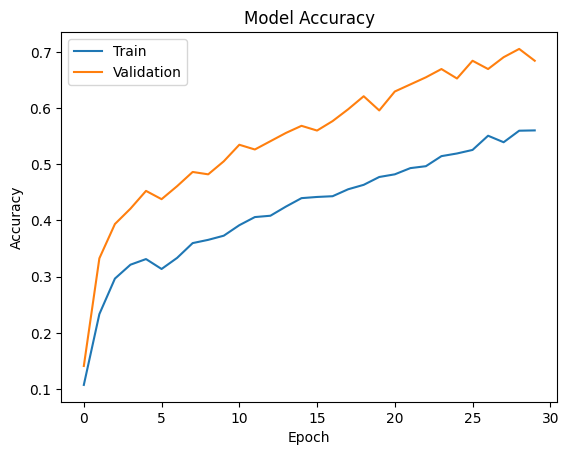

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # Evaluate the model on test data

15/15 - 0s - loss: 1.0578 - accuracy: 0.6821 - 93ms/epoch - 6ms/step


**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)                          # Predict the output probabilities

15/15 [==============================] - 0s 4ms/step


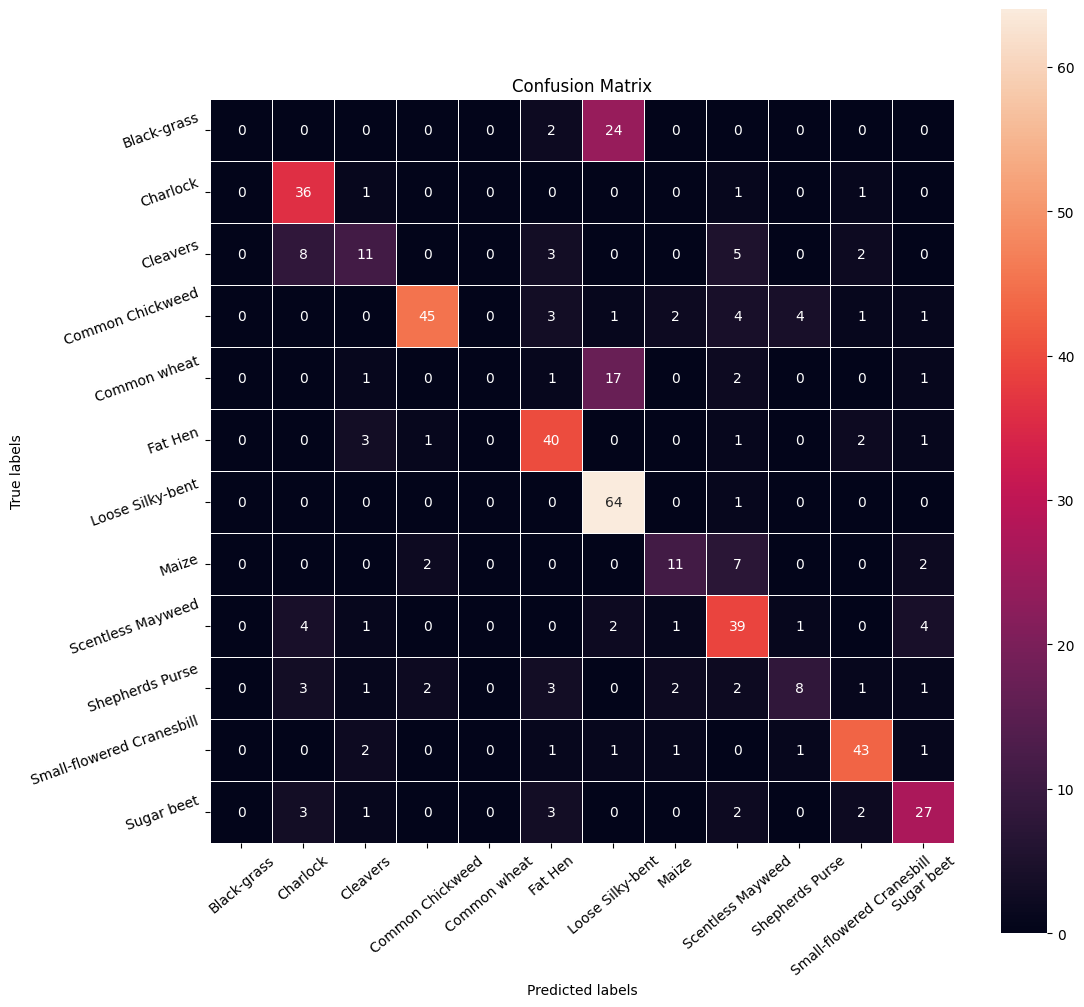

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)              # Plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observations:**
- Black-grass & Common Wheat was completely misclassified and has all incorrect predictions.
- Loose Silky-bent & Cleavers also had sizeable incorrect predictions

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr= classification_report(y_test_arg,y_pred_arg,target_names=enc.classes_)     # Complete the code to plot the classification report
print(cr)

                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        26
                 Charlock       0.67      0.92      0.77        39
                 Cleavers       0.52      0.38      0.44        29
         Common Chickweed       0.90      0.74      0.81        61
             Common wheat       0.00      0.00      0.00        22
                  Fat Hen       0.71      0.83      0.77        48
         Loose Silky-bent       0.59      0.98      0.74        65
                    Maize       0.65      0.50      0.56        22
        Scentless Mayweed       0.61      0.75      0.67        52
          Shepherds Purse       0.57      0.35      0.43        23
Small-flowered Cranesbill       0.83      0.86      0.84        50
               Sugar beet       0.71      0.71      0.71        38

                 accuracy                           0.68       475
                macro avg       0.56      0.59      0.56    

**Observations:**

- Precision, Recall and f1-score are 0 for Black-grass  & Common Wheat
- Precison is low for Loose Silky Bent,Shepherds Purse & Cleavers
- From the confusion matrix as well, we see model did not perform well for Black-grass, Common Wheat, Loose Silkly-bent, Shepherds Purse, Cleavers and Maize
- Other classes have better balance between precision and recall and a decent f1 score
- Overall Accuracy is at 0.68 which is okay but not great

## Model Performance Improvement

**Reducing the Learning Rate:**

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Set the rotation_range to 20 and augment training data
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))

# Add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimimzer
opt=Adam()

# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

<b> Fitting the model on the train data

In [ ]:
# Fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
59/59 [==============================] - 7s 101ms/step - loss: 2.1916 - accuracy: 0.2165 - val_loss: 2.3913 - val_accuracy: 0.3053 - lr: 0.0010
Epoch 2/30
59/59 [==============================] - 4s 69ms/step - loss: 1.7421 - accuracy: 0.3672 - val_loss: 2.2898 - val_accuracy: 0.2463 - lr: 0.0010
Epoch 3/30
59/59 [==============================] - 5s 91ms/step - loss: 1.5812 - accuracy: 0.4221 - val_loss: 2.2276 - val_accuracy: 0.2358 - lr: 0.0010
Epoch 4/30
59/59 [==============================] - 6s 95ms/step - loss: 1.4507 - accuracy: 0.4791 - val_loss: 2.0344 - val_accuracy: 0.3621 - lr: 0.0010
Epoch 5/30
59/59 [==============================] - 4s 70ms/step - loss: 1.3276 - accuracy: 0.5345 - val_loss: 1.9195 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 6/30
59/59 [==============================] - 5s 88ms/step - loss: 1.2516 - accuracy: 0.5626 - val_loss: 1.7637 - val_accuracy: 0.4126 - lr: 0.0010
Epoch 7/30
59/59 [==============================] - 4s 72ms/step - loss: 1.

**Model Evaluation**

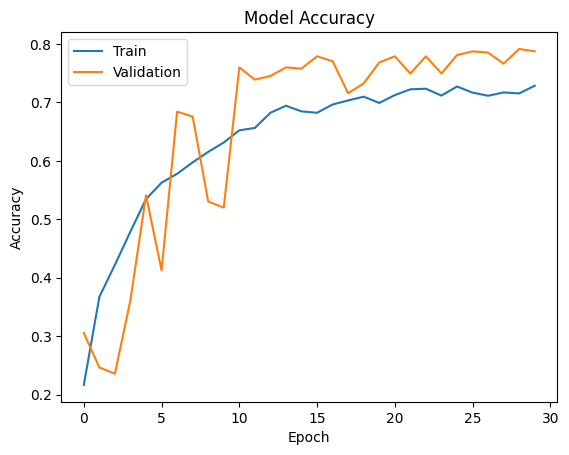

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data

15/15 - 0s - loss: 0.7459 - accuracy: 0.7663 - 73ms/epoch - 5ms/step


**Plotting the Confusion Matrix**

In [ ]:
# Obtain the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


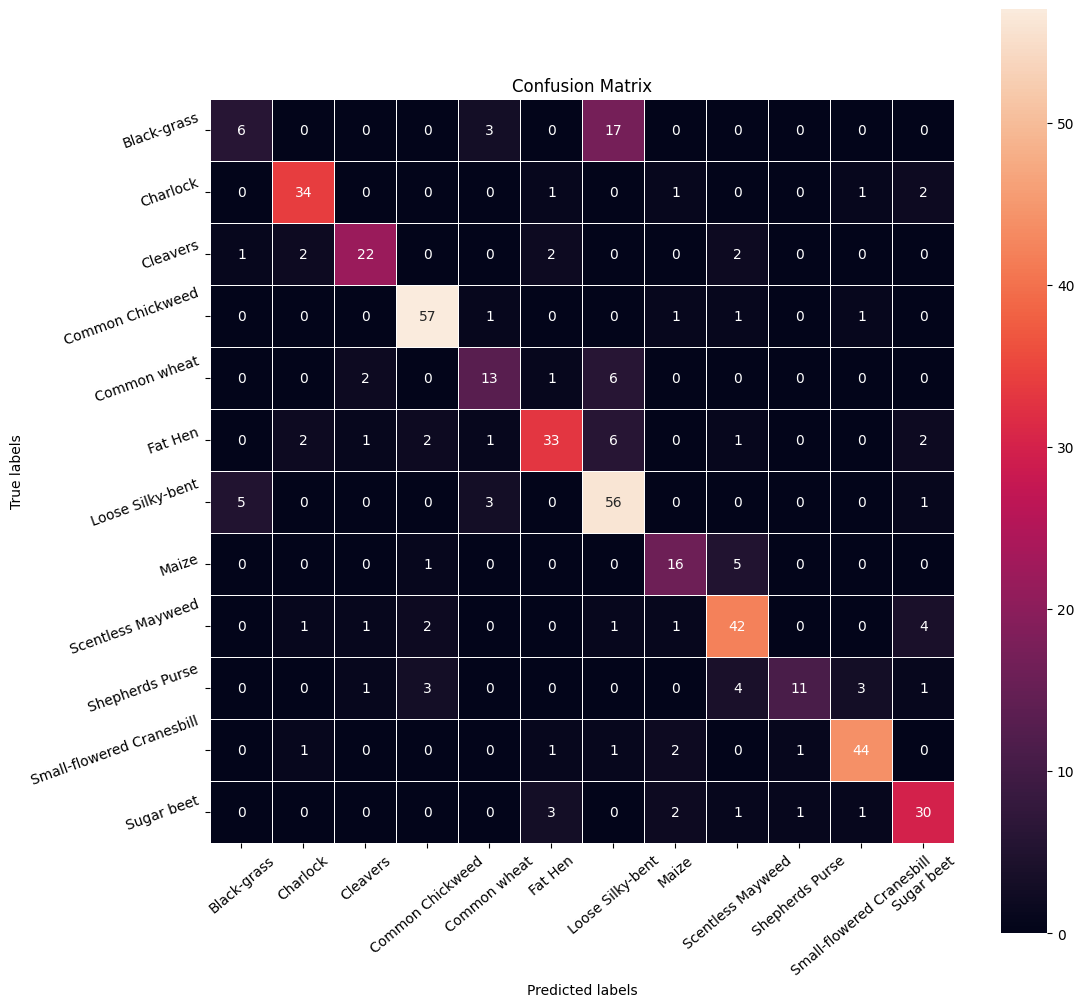

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

Observations:
- The model performs a bit better than the prior one. Now Black-grass has improved precision and recall and so is the case with Common Wheat
- Overall recall and precision is improved

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr=classification_report(y_test_arg,y_pred_arg,target_names=enc.classes_)     # Complete the code to plot the classification report
print(cr)

                           precision    recall  f1-score   support

              Black-grass       0.50      0.23      0.32        26
                 Charlock       0.85      0.87      0.86        39
                 Cleavers       0.81      0.76      0.79        29
         Common Chickweed       0.88      0.93      0.90        61
             Common wheat       0.62      0.59      0.60        22
                  Fat Hen       0.80      0.69      0.74        48
         Loose Silky-bent       0.64      0.86      0.74        65
                    Maize       0.70      0.73      0.71        22
        Scentless Mayweed       0.75      0.81      0.78        52
          Shepherds Purse       0.85      0.48      0.61        23
Small-flowered Cranesbill       0.88      0.88      0.88        50
               Sugar beet       0.75      0.79      0.77        38

                 accuracy                           0.77       475
                macro avg       0.75      0.72      0.72    

## Final Model

**Observations:**

- Precision, Recall and f1-score have now significantly improved for Black-grass  & Common Wheat
- There is improvement in Precison for Loose Silky Bent (0.64) , Sugar beet, Cleavers and Maize have now much improved Precision as well as Recall
- From the confusion matrix as well, we see model did  perform better for Black-grass, Common Wheat, Loose Silkly-bent, Sugar beet, Cleavers and Maize
- Other classes have also bettered or more or less maintained the precision and recall and a decent f1 score
- Shepherds Purse now has a much improved Precision however the Recall although it is still on the lower side at 0.48
- Overall Accuracy is at 0.77 which is a slight improvement over the prior model

### Visualizing the prediction

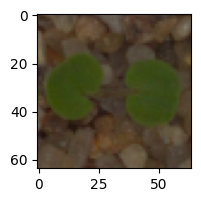

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


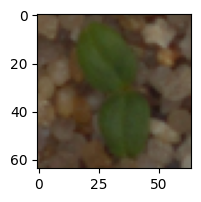

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Cleavers']
True Label Cleavers


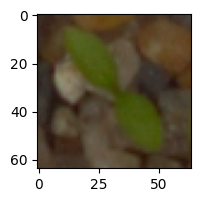

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


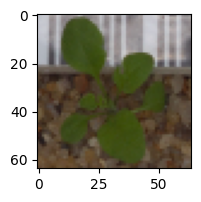

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**- All observations above were correctly predicted by the model**

## Actionable Insights and Business Recommendations

- We have built a CNN-model to predict the class of a plant, which works relatively well.
- CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification
- Combination of image rotation and data augmentation for training data helped improved the model performance
- Strategy to reduce the learning rate when the model's performance /validation loss plateaued or stopped improving also helped with tuning the model further
- Increasing number of epochs and/or adding layers to a model can even increase the performance

In [136]:
!pwd

/content


In [139]:
!jupyter nbconvert --to html CNN_Plant_Seedling_Classification.ipynb

[NbConvertApp] Converting notebook CNN_Plant_Seedling_Classification.ipynb to html
[NbConvertApp] Writing 2439824 bytes to CNN_Plant_Seedling_Classification.html


_____